#[Your_name]

<h1 style="text-align: center;">Data Exploratory Analysis and Processing<h1>

Prepare libraries

In [6]:
# here put every import you need e.g. import pandas
# it's better to load what you need from the package by from [] import [] instead of import the whole package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import re
import seaborn as sns

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

Download data

In [8]:
CBD_boundary = pd.read_csv('chicago-traffic-dataset\chicago-CBD-boundary.csv')
plice_beat_boundary = pd.read_csv('chicago-traffic-dataset\chicago-police-beat-boundries.csv')
street_boundary = pd.read_csv('chicago-traffic-dataset\chicago-street-center-lines.csv')
crashes_people = pd.read_csv('chicago-traffic-dataset/traffic-crashes-people.csv')
crashes_vehicles=pd.read_csv('chicago-traffic-dataset/traffic-crashes-vehicles.csv')
crashes = pd.read_csv('chicago-traffic-dataset/traffic-crashes.csv')

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Sulim\AppData\Local\Temp\ipykernel_14472\3310154124.py:1: SyntaxWarning: invalid escape sequence '\c'
  CBD_boundary = pd.read_csv('chicago-traffic-dataset\chicago-CBD-boundary.csv')
C:\Users\Sulim\AppData\Local\Temp\ipykernel_14472\3310154124.py:2: SyntaxWarning: invalid escape sequence '\c'
  plice_beat_boundary = pd.read_csv('chicago-traffic-dataset\chicago-police-beat-boundries.csv')
C:\Users\Sulim\AppData\Local\Temp\ipykernel_14472\3310154124.py:3: SyntaxWarning: invalid escape sequence '\c'
  street_boundary = pd.read_csv('chicago-traffic-dataset\chicago-street-center-lines.csv')
C:\Users\Sulim\AppData\Local\Temp\ipykernel_14472\3310154124.py:4: DtypeWarning: Columns (19,23,24

<h2 dir="rtl">مثال عن كيفية تنظيم حلول الطلبات:</h2>


<div dir="rtl">شرح ما يقوم به الكود (like code documentation)<div>

In [9]:
# your code here
crashes_people.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN



<div dir="rtl">الاستنتاج<div>

<div dir="rtl">ملاحظاتك في حال وجودها</div>
<div dir="rtl">يمكنك إضافة خلايا لكل طلب بقدر ما تشاء، المهم أن تحافظ على تنظيم الملف</div>

# Question [1]: Data Cleaning & Integration

## [a] Fill Gaps

### [1]

## CRASHES_PEOPLE ##

In [10]:
# first of all lets discover the shape of crashes_people data
# discover columns name and count the mesiing values in each column
print(f'shape is {crashes_people.shape}')
print(crashes_people.isnull().sum().to_string())

shape is (1808605, 29)
PERSON_ID                      0
PERSON_TYPE                    0
CRASH_RECORD_ID                0
VEHICLE_ID                 36177
CRASH_DATE                     0
SEAT_NO                  1443028
CITY                      492062
STATE                     472632
ZIPCODE                   600317
SEX                        29978
AGE                       527939
DRIVERS_LICENSE_STATE     748686
DRIVERS_LICENSE_CLASS     922585
SAFETY_EQUIPMENT            5061
AIRBAG_DEPLOYED            34799
EJECTION                   22453
INJURY_CLASSIFICATION        729
HOSPITAL                 1509447
EMS_AGENCY               1623522
EMS_RUN_NO               1777884
DRIVER_ACTION             368819
DRIVER_VISION             369365
PHYSICAL_CONDITION        367836
PEDPEDAL_ACTION          1774170
PEDPEDAL_VISIBILITY      1774235
PEDPEDAL_LOCATION        1774172
BAC_RESULT                367837
BAC_RESULT VALUE         1806583
CELL_PHONE_USE           1807446


FIrst of all let's drop some columns like (STATE and ZIPCODE) the rule of these 2 columns to identify the location just like CITY and we already know that the crashes are in chicago city so lets drop them

In [11]:
crashes_people.drop(["STATE","ZIPCODE"],axis=1, inplace=True)

we notice that there are to much of messing values in different columns.
so let's dive in the data and discover WTF is going here.
let's start with SEAT_NO column. by looking at the data we notice that most messing value in this column has driver person_type so let's be sure about that.  
first we will look at unique values of person types and we will compare between the messing SEAT_NO values and the person type value


In [12]:
unique_per_typ_vals=crashes_people["PERSON_TYPE"].unique()
unique_per_typ_vals


array(['DRIVER', 'PASSENGER', 'PEDESTRIAN', 'BICYCLE',
       'NON-MOTOR VEHICLE', 'NON-CONTACT VEHICLE'], dtype=object)

In [13]:
crashes_people['mess_seat_no']=None
for typ in list(unique_per_typ_vals):
    crashes_people.loc[(crashes_people['SEAT_NO'].isnull()) & (crashes_people['PERSON_TYPE'] == typ), 'mess_seat_no'] = typ

In [14]:
crashes_people['mess_seat_no'].unique()

array(['DRIVER', None, 'PEDESTRIAN', 'BICYCLE', 'NON-MOTOR VEHICLE',
       'NON-CONTACT VEHICLE'], dtype=object)

In [15]:
for typ in unique_per_typ_vals:
    if typ!="PASSENGER":
        count=crashes_people['mess_seat_no'].value_counts()[typ]
        print(f'count_missing_{typ}_seat_no {count}')
        count_type=crashes_people['PERSON_TYPE'].value_counts()[typ]
        print(f'count_{typ} {count_type}')

count_missing_DRIVER_seat_no 1407381
count_DRIVER 1407381
count_missing_PEDESTRIAN_seat_no 21142
count_PEDESTRIAN 21142
count_missing_BICYCLE_seat_no 12725
count_BICYCLE 12725
count_missing_NON-MOTOR VEHICLE_seat_no 1474
count_NON-MOTOR VEHICLE 1474
count_missing_NON-CONTACT VEHICLE_seat_no 306
count_NON-CONTACT VEHICLE 306


In [16]:
for typ in unique_per_typ_vals:
    if typ!="PASSENGER":
        crashes_people['SEAT_NO'] = np.where(crashes_people['PERSON_TYPE'] == typ, 0 if typ=="DRIVER" else -1, crashes_people['SEAT_NO'])
count_missing_seat_no=crashes_people['SEAT_NO'].isnull().sum()
print(f'Messing SEAT_NO value {count_missing_seat_no}')
crashes_people.drop(['mess_seat_no'],axis=1,inplace=True)


Messing SEAT_NO value 0


We replaced the SEAT_NO messing values of DRIVERS with 0 because that the PASSENGERS have SEAT_NO from 1 to 12 so we considered that the DRIVER has 0 SEAT_NO and THE OTHERS who arent in the vehiacle has -1 SEAT_NO.  

NOW let's move to another column 😁😁

Now let's have a look on Vehicle ID and do the following:  
<ul>
    <li>etrieve the rows where the "VEHICLE_ID" column is NaN (missing). The resulting DataFrame is stored in the variable missing_VID.</li>
    <li>loop over them and update the veihcle id with the value from crashes_vehicle when the crash record ids are equaled</li>
</ul>

In [17]:
print(f'messing values in vehicle id column: {crashes_people["VEHICLE_ID"].isnull().sum()}')
messing_VID=crashes_people[crashes_people["VEHICLE_ID"].isna()]

CRASH_RECORD_IDS=messing_VID["CRASH_RECORD_ID"].tolist()
missing_VIDS = crashes_vehicles[crashes_vehicles['CRASH_RECORD_ID'].isin(CRASH_RECORD_IDS)]
missing_VIDS =missing_VIDS[missing_VIDS["VEHICLE_ID"].notna()]
missing_VIDS = missing_VIDS[["VEHICLE_ID","CRASH_RECORD_ID"]]
vehicle_id_mapping = missing_VIDS.set_index("CRASH_RECORD_ID")["VEHICLE_ID"].to_dict()
crashes_people["VEHICLE_ID"] = crashes_people.apply(
    lambda row: vehicle_id_mapping[row["CRASH_RECORD_ID"]] if( pd.isna(row["VEHICLE_ID"]) and row["CRASH_RECORD_ID"] in vehicle_id_mapping.keys()) else row["VEHICLE_ID"],
    axis=1
)
print(f'messing values in vehicle id column: {crashes_people["VEHICLE_ID"].isnull().sum()}')



messing values in vehicle id column: 36177
messing values in vehicle id column: 168


let's fill the messing values on vehicle_id when the person type is PEDESTRIAN with -1 value which means there is no vehicle

In [18]:
count=((crashes_people["PERSON_TYPE"]=="PEDESTRIAN") & (crashes_people["VEHICLE_ID"].isnull())).sum()
print(f'count of PEDESTRIAN that the VEHICLE_ID is nan is: {count}')
crashes_people['VEHICLE_ID'] = np.where(crashes_people['PERSON_TYPE'] == "PEDESTRIAN", -1, crashes_people['VEHICLE_ID'])
count=((crashes_people["PERSON_TYPE"]=="PEDESTRIAN") & (crashes_people["VEHICLE_ID"].isnull())).sum()
print(f'count of PEDESTRIAN that the VEHICLE_ID is nan is: {count}')

count of PEDESTRIAN that the VEHICLE_ID is nan is: 4
count of PEDESTRIAN that the VEHICLE_ID is nan is: 0


Now let's have a look in CITY column and since we know the crashes are in CHICAGO city let's replace messing values with CHICAGO value.


In [19]:
crashes_people["CITY"]=crashes_people['CITY'].fillna("CHICAGO")
crashes_people['CITY'].isnull().sum()

0

Now let's look at the AGE column and do the following steps:  
<ul>
 <li>store the positive ages in anew column</li>
 <li>calculate the mean of positive ages</li>
 <li>replace negative ages with 0 value</li>
 <li>replace 0 ages with mean value</li>
 <li>replace nan ages with mean value</li>
</ul>

In [20]:
crashes_people['positave_ages']=crashes_people.loc[crashes_people['AGE']>0,'AGE']
mean_of_ages=crashes_people['positave_ages'].mean()
print(f'mean of ages is:{round(mean_of_ages)}')
crashes_people['AGE']=crashes_people['AGE'].apply(lambda x: max(x, 0))
crashes_people['AGE']=crashes_people['AGE'].replace(0,mean_of_ages)
crashes_people['AGE']=crashes_people['AGE'].fillna(mean_of_ages)
crashes_people['AGE'].isnull().sum()


mean of ages is:38


0

Now let's have a look on DRIVERS_LICENSE_STATE and DRIVERS_LICENSE_CLASS  
We Know that for people who aren't drivers they don't need a drivers license so wee will do the following steps:  
<ul>
 <li>create a new column that store (TRUE/FALSE) based on the type of person</li>
 <li>fill nan value in DRIVERS_LICENSE_STATE with not_required if the person type is not driver</li>
 <li>fill nan value in DRIVERS_LICENSE_CLASS with not_required if the person type is not driver</li>
</ul>

In [21]:
crashes_people["DRIVERS_LICENSE_STATE"].isnull().sum()

748686

In [22]:
for typ in unique_per_typ_vals:
    if typ !="DRIVER":
        count=((crashes_people["PERSON_TYPE"]==typ) & (crashes_people["DRIVERS_LICENSE_STATE"].isnull())).sum()
        count1=((crashes_people["PERSON_TYPE"]==typ) & (crashes_people["DRIVERS_LICENSE_CLASS"].isnull())).sum()

        print(f'count of {typ} that the DRIVERS_LICENSE_STATE is nan is: {count}')
        print(f'count of {typ} that the DRIVERS_LICENSE_CLASS is nan is: {count1}')

        crashes_people['DRIVERS_LICENSE_STATE'] = np.where(crashes_people['PERSON_TYPE'] == typ, "NOT REQUIRED", crashes_people['DRIVERS_LICENSE_STATE'])
        crashes_people['DRIVERS_LICENSE_CLASS'] = np.where(crashes_people['PERSON_TYPE'] == typ, "NOT REQUIRED", crashes_people['DRIVERS_LICENSE_CLASS'])

        count=((crashes_people["PERSON_TYPE"]==typ) & (crashes_people["DRIVERS_LICENSE_STATE"].isnull())).sum()
        count1=((crashes_people["PERSON_TYPE"]==typ) & (crashes_people["DRIVERS_LICENSE_CLASS"].isnull())).sum()

        print(f'count of {typ} that the DRIVERS_LICENSE_STATE is nan is: {count}')
        print(f'count of {typ} that the DRIVERS_LICENSE_CLASS is nan is: {count1}')
        print("************************************************************************************")

count of PASSENGER that the DRIVERS_LICENSE_STATE is nan is: 365577
count of PASSENGER that the DRIVERS_LICENSE_CLASS is nan is: 365577
count of PASSENGER that the DRIVERS_LICENSE_STATE is nan is: 0
count of PASSENGER that the DRIVERS_LICENSE_CLASS is nan is: 0
************************************************************************************
count of PEDESTRIAN that the DRIVERS_LICENSE_STATE is nan is: 21142
count of PEDESTRIAN that the DRIVERS_LICENSE_CLASS is nan is: 21142
count of PEDESTRIAN that the DRIVERS_LICENSE_STATE is nan is: 0
count of PEDESTRIAN that the DRIVERS_LICENSE_CLASS is nan is: 0
************************************************************************************
count of BICYCLE that the DRIVERS_LICENSE_STATE is nan is: 12725
count of BICYCLE that the DRIVERS_LICENSE_CLASS is nan is: 12725
count of BICYCLE that the DRIVERS_LICENSE_STATE is nan is: 0
count of BICYCLE that the DRIVERS_LICENSE_CLASS is nan is: 0
****************************************************

Now lets use LIC_PLATE_STATE from crashes_vehicles and try to find DRIVERS_LISANCE_STATE nan value based on the VEHICLE_ID by following steps:  


1.  Take subset of crashes_vehicles that have UNIT_TYPE==DRIVER and LIC_PLATE_STATE not nan.
2.   Take the indexs of rows from crahes_people where PERSON_TYPE==DRIVER and DRIVERS_LICANSE_STATE is nan
3. loop over indexes:
    1. get the VEHICLE_ID from that row in crashes_people
    2. get the row that has the same vehicle_id from the subset of crashes_vehicles.
    3. update DRIVERS_LISANCE_STATE by the value of LIC_PLATE_STATE in that row







In [23]:
to_search=crashes_vehicles.loc[(crashes_vehicles["UNIT_TYPE"]=="DRIVER")&(crashes_vehicles["LIC_PLATE_STATE"].notna())]

This cell take alot of time be patient please 😴

In [24]:
indexes=crashes_people.loc[(crashes_people["PERSON_TYPE"]=="DRIVER") & (crashes_people["DRIVERS_LICENSE_STATE"].isna())].index
for index in indexes.tolist():
  vehicle_id=crashes_people.at[index,"VEHICLE_ID"]
  vehicle_row = to_search.loc[to_search['VEHICLE_ID'] == vehicle_id]
  if not vehicle_row.empty:
            crashes_people.at[index,'DRIVERS_LICENSE_STATE'] = vehicle_row.iloc[0]['LIC_PLATE_STATE']

In [25]:
print(crashes_people["DRIVERS_LICENSE_STATE"].isnull().sum())
print(crashes_people["DRIVERS_LICENSE_CLASS"].isnull().sum())
print(crashes_people["DRIVERS_LICENSE_CLASS"].value_counts())

101351
521446
DRIVERS_LICENSE_CLASS
D               771240
NOT REQUIRED    401224
A                31588
C                24198
B                24115
                 ...  
PP                   1
C2                   1
D6                   1
A+                   1
JR                   1
Name: count, Length: 282, dtype: int64


In [26]:
crashes_people['DRIVERS_LICENSE_STATE'] = np.where(((crashes_people['PERSON_TYPE'] == "DRIVER")&crashes_people['DRIVERS_LICENSE_STATE'].isna()), "NOT SET", crashes_people['DRIVERS_LICENSE_STATE'])
crashes_people['DRIVERS_LICENSE_CLASS'] = np.where(((crashes_people['PERSON_TYPE'] == "DRIVER")&crashes_people['DRIVERS_LICENSE_CLASS'].isna()), "NOT SET", crashes_people['DRIVERS_LICENSE_CLASS'])

In [27]:
print(crashes_people["DRIVERS_LICENSE_STATE"].isnull().sum())
print(crashes_people["DRIVERS_LICENSE_CLASS"].isnull().sum())
print(crashes_people["DRIVERS_LICENSE_CLASS"].value_counts())
print(crashes_people["DRIVERS_LICENSE_STATE"].value_counts())

0
0
DRIVERS_LICENSE_CLASS
D               771240
NOT SET         521446
NOT REQUIRED    401224
A                31588
C                24198
                 ...  
PP                   1
C2                   1
D6                   1
A+                   1
JR                   1
Name: count, Length: 283, dtype: int64
DRIVERS_LICENSE_STATE
IL              1182591
NOT REQUIRED     401224
NOT SET          101351
XX                45582
IN                21883
                 ...   
LU                    1
SL                    1
ES                    1
GM                    1
YU                    1
Name: count, Length: 212, dtype: int64


In [28]:
crashes_people.drop(["HOSPITAL","EMS_AGENCY","EMS_RUN_NO","PEDPEDAL_ACTION"
                    ,"PEDPEDAL_VISIBILITY","PEDPEDAL_LOCATION",
                    "BAC_RESULT VALUE","CELL_PHONE_USE","positave_ages"]
                    ,axis=1, inplace=True)

In [29]:
res=crashes_people["SAFETY_EQUIPMENT"].where(crashes_people["PERSON_TYPE"]=="PEDESTRIAN")
res.unique()

array([nan, 'NONE PRESENT', 'USAGE UNKNOWN', 'WHEELCHAIR',
       'SAFETY BELT NOT USED', 'SAFETY BELT USED', 'HELMET NOT USED',
       'HELMET USED', 'CHILD RESTRAINT - FORWARD FACING',
       'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)',
       'CHILD RESTRAINT USED', 'STRETCHER',
       'CHILD RESTRAINT - TYPE UNKNOWN', 'CHILD RESTRAINT NOT USED',
       'DOT COMPLIANT MOTORCYCLE HELMET', 'BOOSTER SEAT'], dtype=object)

In [30]:
print(f'shape is {crashes_people.shape}')
print(crashes_people.isnull().sum().to_string())

shape is (1808605, 19)
PERSON_ID                     0
PERSON_TYPE                   0
CRASH_RECORD_ID               0
VEHICLE_ID                  164
CRASH_DATE                    0
SEAT_NO                       0
CITY                          0
SEX                       29978
AGE                           0
DRIVERS_LICENSE_STATE         0
DRIVERS_LICENSE_CLASS         0
SAFETY_EQUIPMENT           5061
AIRBAG_DEPLOYED           34799
EJECTION                  22453
INJURY_CLASSIFICATION       729
DRIVER_ACTION            368819
DRIVER_VISION            369365
PHYSICAL_CONDITION       367836
BAC_RESULT               367837


In [31]:
crashes_people=crashes_people.dropna()

In [32]:
print(f'shape is {crashes_people.shape}')
print(crashes_people.isnull().sum().to_string())

shape is (1407877, 19)
PERSON_ID                0
PERSON_TYPE              0
CRASH_RECORD_ID          0
VEHICLE_ID               0
CRASH_DATE               0
SEAT_NO                  0
CITY                     0
SEX                      0
AGE                      0
DRIVERS_LICENSE_STATE    0
DRIVERS_LICENSE_CLASS    0
SAFETY_EQUIPMENT         0
AIRBAG_DEPLOYED          0
EJECTION                 0
INJURY_CLASSIFICATION    0
DRIVER_ACTION            0
DRIVER_VISION            0
PHYSICAL_CONDITION       0
BAC_RESULT               0


## CRASHES ##

In [33]:
print(f'shape is {crashes.shape}')
print(crashes.isnull().sum().to_string())

shape is (823957, 47)
CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 762398
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         624947
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       24578
CRASH_TYPE                            0
INTERSECTION_RELATED_I           635017
NOT_RIGHT_OF_WAY_I               785972
HIT_AND_RUN_I                    565983
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION  

In [34]:
crashes.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,...,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


In [35]:
crashes=crashes.drop(columns=['CRASH_DATE_EST_I','NOT_RIGHT_OF_WAY_I','PHOTOS_TAKEN_I',
'STATEMENTS_TAKEN_I','DOORING_I','WORK_ZONE_I','WORK_ZONE_TYPE','WORKERS_PRESENT_I','INJURIES_UNKNOWN'])

In [36]:
categorical_columns = ['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
                       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
                       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
                       'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I','HIT_AND_RUN_I',
                       'DAMAGE' ,'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION',
                       'STREET_NAME', 'MOST_SEVERE_INJURY', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK','CRASH_MONTH']
types = {col: 'category' for col in categorical_columns}
crashes=crashes.astype(types)

In [37]:
crashes.dropna(subset=['STREET_NAME'], inplace=True)

In [38]:
mean_coords_by_street_name = crashes.groupby('STREET_NAME')[['LATITUDE', 'LONGITUDE']].mean()

for street_name, mean_values in mean_coords_by_street_name.iterrows():
    crashes.loc[crashes['STREET_NAME'] == street_name, 'LATITUDE'] = crashes.loc[crashes['STREET_NAME'] == street_name, 'LATITUDE'].fillna(mean_values['LATITUDE'])
    crashes.loc[crashes['STREET_NAME'] == street_name, 'LONGITUDE'] = crashes.loc[crashes['STREET_NAME'] == street_name, 'LONGITUDE'].fillna(mean_values['LONGITUDE'])

C:\Users\Sulim\AppData\Local\Temp\ipykernel_14472\3772044967.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_coords_by_street_name = crashes.groupby('STREET_NAME')[['LATITUDE', 'LONGITUDE']].mean()


In [39]:
mean_coords_by_street_no = crashes.groupby('STREET_NO')[['LATITUDE', 'LONGITUDE']].mean()

for street_name, mean_values in mean_coords_by_street_no.iterrows():
    crashes.loc[crashes['STREET_NO'] == street_name, 'LATITUDE'] = crashes.loc[crashes['STREET_NO'] == street_name, 'LATITUDE'].fillna(mean_values['LATITUDE'])
    crashes.loc[crashes['STREET_NO'] == street_name, 'LONGITUDE'] = crashes.loc[crashes['STREET_NO'] == street_name, 'LONGITUDE'].fillna(mean_values['LONGITUDE'])

In [40]:
crashes.dropna(subset=['LATITUDE'], inplace=True)
crashes['LATITUDE'] = crashes['LATITUDE'].round(9)
crashes['LONGITUDE'] = crashes['LONGITUDE'].round(9)
crashes['LOCATION'] = crashes.apply(
    lambda row: f"POINT ({row['LONGITUDE']} {row['LATITUDE']})" if pd.isnull(row['LOCATION']) else row['LOCATION'],
    axis=1)

In [41]:
crashes[crashes['STREET_DIRECTION'].isnull()]['TRAFFICWAY_TYPE']

670       DIVIDED - W/MEDIAN (NOT RAISED)
5932                          PARKING LOT
686095    DIVIDED - W/MEDIAN (NOT RAISED)
Name: TRAFFICWAY_TYPE, dtype: category
Categories (20, object): ['ALLEY', 'CENTER TURN LANE', 'DIVIDED - W/MEDIAN (NOT RAISED)', 'DIVIDED - W/MEDIAN BARRIER', ..., 'TRAFFIC ROUTE', 'UNKNOWN', 'UNKNOWN INTERSECTION TYPE', 'Y-INTERSECTION']

In [42]:
print(crashes[crashes['TRAFFICWAY_TYPE']=='DIVIDED - W/MEDIAN (NOT RAISED)'].groupby('STREET_DIRECTION').size())
print(crashes[crashes['TRAFFICWAY_TYPE']=='PARKING LOT'].groupby('STREET_DIRECTION').size())

STREET_DIRECTION
E     7076
N    32644
S    42133
W    49677
dtype: int64
STREET_DIRECTION
E     4098
N    11950
S    20310
W    19749
dtype: int64


C:\Users\Sulim\AppData\Local\Temp\ipykernel_14472\230501822.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(crashes[crashes['TRAFFICWAY_TYPE']=='DIVIDED - W/MEDIAN (NOT RAISED)'].groupby('STREET_DIRECTION').size())
C:\Users\Sulim\AppData\Local\Temp\ipykernel_14472\230501822.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(crashes[crashes['TRAFFICWAY_TYPE']=='PARKING LOT'].groupby('STREET_DIRECTION').size())


In [43]:
crashes.loc[(crashes['TRAFFICWAY_TYPE'] == "DIVIDED - W/MEDIAN (NOT RAISED)") & (crashes['STREET_DIRECTION'].isnull()), 'STREET_DIRECTION'] = "W"
crashes.loc[(crashes['TRAFFICWAY_TYPE'] == "PARKING LOT") & (crashes['STREET_DIRECTION'].isnull()), 'STREET_DIRECTION'] = "S"
crashes[crashes['STREET_DIRECTION'].isnull()]['TRAFFICWAY_TYPE'].count()

0

In [44]:
ratio_df = crashes.groupby(['STREET_NAME', 'REPORT_TYPE']).size() / crashes.groupby('STREET_NAME').size()
max_ratio_streets = ratio_df.groupby('REPORT_TYPE').idxmax()

highest_ratio_streets = max_ratio_streets.apply(lambda x: x[0])
print(highest_ratio_streets)

REPORT_TYPE
AMENDED                       UNION ST
NOT ON SCENE (DESK REPORT)     11TH PL
ON SCENE                      100TH DR
dtype: object


C:\Users\Sulim\AppData\Local\Temp\ipykernel_14472\1655419837.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_df = crashes.groupby(['STREET_NAME', 'REPORT_TYPE']).size() / crashes.groupby('STREET_NAME').size()
C:\Users\Sulim\AppData\Local\Temp\ipykernel_14472\1655419837.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_df = crashes.groupby(['STREET_NAME', 'REPORT_TYPE']).size() / crashes.groupby('STREET_NAME').size()
C:\Users\Sulim\AppData\Local\Temp\ipykernel_14472\1655419837.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of p

In [45]:
ratio_df = crashes.groupby(['STREET_NAME', 'REPORT_TYPE']).size() / crashes.groupby('STREET_NAME').size()
max_ratio_streets = ratio_df.groupby('STREET_NAME').idxmax()
highest_ratio_report_type = max_ratio_streets.apply(lambda x: np.nan if pd.isnull(x) else x[1])
crashes['REPORT_TYPE'] = crashes.apply(lambda row: highest_ratio_report_type[row['STREET_NAME']] if pd.isnull(row['REPORT_TYPE']) else row['REPORT_TYPE'], axis=1)
crashes[crashes['REPORT_TYPE'].isnull()]

C:\Users\Sulim\AppData\Local\Temp\ipykernel_14472\3547344452.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_df = crashes.groupby(['STREET_NAME', 'REPORT_TYPE']).size() / crashes.groupby('STREET_NAME').size()
C:\Users\Sulim\AppData\Local\Temp\ipykernel_14472\3547344452.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_df = crashes.groupby(['STREET_NAME', 'REPORT_TYPE']).size() / crashes.groupby('STREET_NAME').size()
C:\Users\Sulim\AppData\Local\Temp\ipykernel_14472\3547344452.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of p

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION


In [46]:
crashes.pivot_table(crashes, index='REPORT_TYPE', columns='FIRST_CRASH_TYPE', aggfunc='size', fill_value=0,observed=False)

FIRST_CRASH_TYPE,ANGLE,ANIMAL,FIXED OBJECT,HEAD ON,OTHER NONCOLLISION,OTHER OBJECT,OVERTURNED,PARKED MOTOR VEHICLE,PEDALCYCLIST,PEDESTRIAN,REAR END,REAR TO FRONT,REAR TO REAR,REAR TO SIDE,SIDESWIPE OPPOSITE DIRECTION,SIDESWIPE SAME DIRECTION,TRAIN,TURNING
REPORT_TYPE,,,,,,,,,,,,,,,,,,
AMENDED,30,1,9,3,0,1,0,44,2,6,64,0,0,0,4,47,0,31
NOT ON SCENE (DESK REPORT),44946,310,9558,3041,1532,3731,43,110652,4227,4875,127613,5393,1329,3037,6837,84686,3,60927
ON SCENE,44688,281,29156,3984,1065,4431,462,80741,8154,14350,56270,2624,329,1729,4762,41041,43,56858


## CRASHES_VEHICLES ##

In [47]:
print(f'shape is {crashes_vehicles.shape}')
print(crashes_vehicles.isnull().sum().to_string())
crashes_vehicles.head()

shape is (1680892, 70)
CRASH_UNIT_ID                     0
CRASH_RECORD_ID                   0
CRASH_DATE                        0
UNIT_NO                           0
UNIT_TYPE                      2150
VEHICLE_ID                    38473
CMRC_VEH_I                  1649615
MAKE                          38478
MODEL                         38623
LIC_PLATE_STATE              188917
VEHICLE_YEAR                 301958
VEHICLE_DEFECT                38473
VEHICLE_TYPE                  38473
VEHICLE_USE                   38473
TRAVEL_DIRECTION              38473
MANEUVER                      38473
TOWED_I                     1472365
FIRE_I                      1679517
OCCUPANT_CNT                  38473
EXCEED_SPEED_LIMIT_I        1678495
TOWED_BY                    1524003
TOWED_TO                    1584546
AREA_00_I                   1623152
AREA_01_I                   1231298
AREA_02_I                   1414448
AREA_03_I                   1519765
AREA_04_I                   1520419
AREA_

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,LIC_PLATE_STATE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,1717556,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,12/06/2023 03:24:00 PM,1,DRIVER,1634931.0,NaN,NISSAN,SENTRA,IL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1717574,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,12/06/2023 04:00:00 PM,2,DRIVER,1634978.0,NaN,CHRYSLER,SEBRING,IL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1717579,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,12/06/2023 04:30:00 PM,1,DRIVER,1634948.0,NaN,SUBARU,OUTBACK,IL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1720118,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,1,DRIVER,1637401.0,NaN,TOYOTA,RAV4,IL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1720119,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,2,DRIVER,1637408.0,NaN,SUBARU,OUTBACK,OK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's have a look on UNIT_TYP column

In [48]:
print(crashes_vehicles['UNIT_TYPE'].value_counts())
print(f'messing values count is :{crashes_vehicles["UNIT_TYPE"].isnull().sum()}')

UNIT_TYPE
DRIVER                 1407381
PARKED                  221654
PEDESTRIAN               21142
DRIVERLESS               13803
BICYCLE                  12725
NON-MOTOR VEHICLE         1474
NON-CONTACT VEHICLE        306
DISABLED VEHICLE           250
EQUESTRIAN                   7
Name: count, dtype: int64
messing values count is :2150


After having a look on UNIT_ID with CRASH_DATE columns we

notices that there are duplicated rows so let's dive in and discover what is that and do the following steps:  


1.   merge LOCATION , UNIT_NO and CRASH_DATE based on CRASH_DATE column from crashes and crashes_vehicles
2.   convert the location values to comparable values
3.   find the duplicated rows (the same unit id and the same location at the same time)
4.   return the CRASH_DATE and UNIT_ID as a result data frame



In [49]:
merged_df = pd.merge(crashes[["CRASH_DATE","LOCATION"]], crashes_vehicles[["CRASH_DATE","UNIT_NO"]], on='CRASH_DATE')
merged_df['LOCATION'] = merged_df['LOCATION'].str.extract(r'\((.*?)\)')
duplicates_df = merged_df[merged_df.duplicated(subset=['LOCATION', 'CRASH_DATE',"UNIT_NO"], keep=False)]
result_df = duplicates_df[['CRASH_DATE', 'UNIT_NO']]

Create a mask that check if the crashes_vehicles row has  
CRASH_DATE , UNIT_NO that are in result_df

In [50]:
mask = crashes_vehicles['CRASH_DATE'].isin(result_df['CRASH_DATE']) & crashes_vehicles['UNIT_NO'].isin(result_df['UNIT_NO'])




1.    Create a column to represent the duplicate status of each row
2.   Sort the DataFrame by the 'is_duplicate' column in descending order
3. Drop duplicate rows while keeping the first occurrence of each unique combination of 'CRASH_DATE' and 'UNIT_NO'
4. Remove the 'is_duplicate' column



In [51]:
print(crashes_vehicles.shape)
crashes_vehicles['is_duplicate'] = mask
crashes_vehicles.sort_values('is_duplicate', ascending=False, inplace=True)
crashes_vehicles.drop_duplicates(subset=['CRASH_DATE', 'UNIT_NO'], keep='first', inplace=True)
print(crashes_vehicles.shape)


(1680892, 70)
(1126125, 71)


Let's have a look at the column MAKE

In [52]:
MAKE=crashes_vehicles["MAKE"]
print(MAKE.value_counts())
print(f"nan values count:{MAKE.isnull().sum()}")

MAKE
CHEVROLET                                                       129541
FORD                                                            111479
UNKNOWN                                                          99896
NISSAN                                                           89536
HONDA                                                            80729
                                                                 ...  
WARD INDUSTRIES                                                      1
AERO LINER COMPANY                                                   1
"IMPERIAL -- CODES BELOW ARE ONLY FOR 1980 AND EARLIER MODEL         1
MELROE DIVISION CLARK EQUIPMENT COMPANY (FARGO, ND)                  1
TOWNER MANUFACTURING COMPANY                                         1
Name: count, Length: 1147, dtype: int64
nan values count:26954


We Notice that all messing values in MAKE columns are also messing in MODEL AND VEHICLE_ID it's like a noise or useless data that have been added to the data let's amke sure about it.


In [53]:
result =crashes_vehicles[crashes_vehicles["MAKE"].isnull()]
sub_res=result[["MAKE","MODEL","VEHICLE_ID"]]
print(sub_res.isnull().sum().to_string())

MAKE          26954
MODEL         26951
VEHICLE_ID    26950


In [54]:
print(result.isnull().sum().to_string())

CRASH_UNIT_ID                   0
CRASH_RECORD_ID                 0
CRASH_DATE                      0
UNIT_NO                         0
UNIT_TYPE                     835
VEHICLE_ID                  26950
CMRC_VEH_I                  26954
MAKE                        26954
MODEL                       26951
LIC_PLATE_STATE             26950
VEHICLE_YEAR                26950
VEHICLE_DEFECT              26950
VEHICLE_TYPE                26950
VEHICLE_USE                 26950
TRAVEL_DIRECTION            26950
MANEUVER                    26950
TOWED_I                     26953
FIRE_I                      26954
OCCUPANT_CNT                26950
EXCEED_SPEED_LIMIT_I        26954
TOWED_BY                    26953
TOWED_TO                    26953
AREA_00_I                   26954
AREA_01_I                   26952
AREA_02_I                   26952
AREA_03_I                   26953
AREA_04_I                   26953
AREA_05_I                   26953
AREA_06_I                   26951
AREA_07_I     

SOo let's see what are the unit types of those vehicles

In [55]:
result["UNIT_TYPE"].value_counts()

UNIT_TYPE
PEDESTRIAN             15611
BICYCLE                 8825
NON-MOTOR VEHICLE       1080
DRIVER                   394
NON-CONTACT VEHICLE      102
PARKED                    88
DRIVERLESS                13
EQUESTRIAN                 5
DISABLED VEHICLE           1
Name: count, dtype: int64

We notice that the type of those units are not MAKEABLE so it's logical for model and make to be nan.  
what we will do now is :
1. fill the make and the model for humans (PEDESTRIAN) with values like (MAKE: "GOD" ,MODEL: "HUMAN"😅😁)
2. fill the make and model values for other types like (BICYCLE,NON-MOTOR VEHICLE,....etc) with "UNIDENTIFIED" for ex.
3. for vehicle_id just as what we did in crashes_people we will assign -1 for these unit types.

In [56]:
for unit_type in result["UNIT_TYPE"].unique():
    if unit_type == "PEDESTRIAN":
        crashes_vehicles['MAKE'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, "GOD", crashes_vehicles['MAKE'])
        crashes_vehicles['MODEL'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, "HUMAN", crashes_vehicles['MODEL'])
        crashes_vehicles['VEHICLE_ID'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, -1 , crashes_vehicles['VEHICLE_ID'])
    elif unit_type != "DRIVER":
        crashes_vehicles['MAKE'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, "UNIDENTIFIED", crashes_vehicles['MAKE'])
        crashes_vehicles['MODEL'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, "UNIDENTIFIED", crashes_vehicles['MODEL'])
        crashes_vehicles['VEHICLE_ID'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, -1, crashes_vehicles['VEHICLE_ID'])


Now lets take another look in the result to see the remaning missing value based on the unit type

In [57]:
result=crashes_vehicles[["VEHICLE_YEAR","VEHICLE_DEFECT","VEHICLE_TYPE","VEHICLE_USE","TRAVEL_DIRECTION","MANEUVER","UNIT_TYPE"]]
print(result.isnull().sum().to_string())

VEHICLE_YEAR        191627
VEHICLE_DEFECT       26950
VEHICLE_TYPE         26950
VEHICLE_USE          26950
TRAVEL_DIRECTION     26950
MANEUVER             26950
UNIT_TYPE              843


In [58]:
result=result.loc[result["VEHICLE_TYPE"].isnull() & result["VEHICLE_USE"].isnull() & result["TRAVEL_DIRECTION"].isnull() & result["VEHICLE_DEFECT"].isnull() & result["MANEUVER"].isnull() & result["VEHICLE_YEAR"].isnull()]
result["UNIT_TYPE"].value_counts()

UNIT_TYPE
PEDESTRIAN             15611
BICYCLE                 8825
NON-MOTOR VEHICLE       1080
DRIVER                   390
NON-CONTACT VEHICLE      102
PARKED                    88
DRIVERLESS                13
EQUESTRIAN                 5
DISABLED VEHICLE           1
Name: count, dtype: int64

As the previous note we will apply the same logic on those columns

In [59]:
for unit_type in result["UNIT_TYPE"].unique():
    if unit_type != "DRIVER":
        crashes_vehicles['VEHICLE_TYPE'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, "UNIDENTIFIED" if unit_type != "PEDESTRIAN" else "HUMAN", crashes_vehicles['VEHICLE_TYPE'])
        crashes_vehicles['VEHICLE_USE'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, "UNIDENTIFIED", crashes_vehicles['VEHICLE_USE'])
        crashes_vehicles['TRAVEL_DIRECTION'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, -1, crashes_vehicles['TRAVEL_DIRECTION'])
        crashes_vehicles['VEHICLE_DEFECT'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, -1, crashes_vehicles['VEHICLE_DEFECT'])
        crashes_vehicles['MANEUVER'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, -1, crashes_vehicles['MANEUVER'])
        crashes_vehicles['VEHICLE_YEAR'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, -1, crashes_vehicles['VEHICLE_YEAR'])



In [60]:
print(crashes_vehicles.isnull().sum().to_string())

CRASH_UNIT_ID                     0
CRASH_RECORD_ID                   0
CRASH_DATE                        0
UNIT_NO                           0
UNIT_TYPE                       843
VEHICLE_ID                     1225
CMRC_VEH_I                  1104328
MAKE                           1229
MODEL                          1313
LIC_PLATE_STATE              118216
VEHICLE_YEAR                 156188
VEHICLE_DEFECT                 1225
VEHICLE_TYPE                   1225
VEHICLE_USE                    1225
TRAVEL_DIRECTION               1225
MANEUVER                       1225
TOWED_I                      964816
FIRE_I                      1125004
OCCUPANT_CNT                  26950
EXCEED_SPEED_LIMIT_I        1124271
TOWED_BY                    1004116
TOWED_TO                    1050838
AREA_00_I                   1087190
AREA_01_I                    812897
AREA_02_I                    942284
AREA_03_I                   1016819
AREA_04_I                   1016125
AREA_05_I                   

WE notice that there are many columns has kinda the same count of messing values  
lets drop columns that has 75% messing value then descover what is going here

In [61]:
null_percent = crashes_vehicles.isnull().mean() * 100
columns_to_drop = null_percent[null_percent >= 75].index
crashes_vehicles.drop(columns=columns_to_drop, inplace=True)

In [62]:
print(f'shape is {crashes_vehicles.shape}')
print(crashes_vehicles.isnull().sum().to_string())

shape is (1126125, 19)
CRASH_UNIT_ID               0
CRASH_RECORD_ID             0
CRASH_DATE                  0
UNIT_NO                     0
UNIT_TYPE                 843
VEHICLE_ID               1225
MAKE                     1229
MODEL                    1313
LIC_PLATE_STATE        118216
VEHICLE_YEAR           156188
VEHICLE_DEFECT           1225
VEHICLE_TYPE             1225
VEHICLE_USE              1225
TRAVEL_DIRECTION         1225
MANEUVER                 1225
OCCUPANT_CNT            26950
AREA_01_I              812897
FIRST_CONTACT_POINT     28939
is_duplicate                0


lets take the rows when the VEHICLE_DEFECT is null

In [63]:
result=crashes_vehicles[crashes_vehicles["VEHICLE_DEFECT"].isnull()]
print(result.isnull().sum().to_string())

CRASH_UNIT_ID             0
CRASH_RECORD_ID           0
CRASH_DATE                0
UNIT_NO                   0
UNIT_TYPE               835
VEHICLE_ID             1225
MAKE                   1225
MODEL                  1225
LIC_PLATE_STATE        1225
VEHICLE_YEAR           1225
VEHICLE_DEFECT         1225
VEHICLE_TYPE           1225
VEHICLE_USE            1225
TRAVEL_DIRECTION       1225
MANEUVER               1225
OCCUPANT_CNT           1225
AREA_01_I              1225
FIRST_CONTACT_POINT    1225
is_duplicate              0


We can see the most of row values is nan so we can remove them

In [64]:
crashes_vehicles=crashes_vehicles[crashes_vehicles["VEHICLE_DEFECT"].notna()]
print(crashes_vehicles.isnull().sum().to_string())

CRASH_UNIT_ID               0
CRASH_RECORD_ID             0
CRASH_DATE                  0
UNIT_NO                     0
UNIT_TYPE                   8
VEHICLE_ID                  0
MAKE                        4
MODEL                      88
LIC_PLATE_STATE        116991
VEHICLE_YEAR           154963
VEHICLE_DEFECT              0
VEHICLE_TYPE                0
VEHICLE_USE                 0
TRAVEL_DIRECTION            0
MANEUVER                    0
OCCUPANT_CNT            25725
AREA_01_I              811672
FIRST_CONTACT_POINT     27714
is_duplicate                0


let's drop AREA_01_I column

In [65]:
crashes_vehicles.drop(["AREA_01_I"],axis=1,inplace=True)
print(crashes_vehicles.isnull().sum().to_string())

CRASH_UNIT_ID               0
CRASH_RECORD_ID             0
CRASH_DATE                  0
UNIT_NO                     0
UNIT_TYPE                   8
VEHICLE_ID                  0
MAKE                        4
MODEL                      88
LIC_PLATE_STATE        116991
VEHICLE_YEAR           154963
VEHICLE_DEFECT              0
VEHICLE_TYPE                0
VEHICLE_USE                 0
TRAVEL_DIRECTION            0
MANEUVER                    0
OCCUPANT_CNT            25725
FIRST_CONTACT_POINT     27714
is_duplicate                0


let's have a look on vehicle_year column

In [66]:
result=crashes_vehicles["VEHICLE_YEAR"]
print(result.min())
print(result.max())
unique_values=result.unique().tolist()
print(sorted(unique_values))

-1.0
9999.0
[-1.0, 1900.0, 1901.0, 1902.0, 1905.0, 1911.0, 1929.0, 1939.0, 1941.0, 1951.0, 1952.0, 1953.0, 1954.0, 1957.0, 1958.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2013.0, 2015.0, nan, 2011.0, 2012.0, 2014.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 2024.0, 2025.0, 2026.0, 2027.0, 2028.0, 2029.0, 2030.0, 2031.0, 2032.0, 2033.0, 2034.0, 2040.0, 2041.0, 2044.0, 2045.0, 2047.0, 2048.0, 2049.0, 2054.0, 2055.0, 2066.0, 2071.0, 2077.0, 2088.0, 2095.0, 2096.0, 2097.0, 2099.0, 2100.0, 2101.0, 2102.0, 2103.0, 2104.0, 2105.0, 2106.0, 2107.0, 2108.0, 2109.0, 2110.0, 2112.0, 2113.0, 2115.0, 2116.0, 2117.0, 

we can see that there are alot of un logical years like 9999 so we will replace values like those  or all years those are greater than 2024 with -1 to notify unknown values with nan values.

In [67]:
crashes_vehicles.loc[crashes_vehicles["VEHICLE_YEAR"]>2024 ,'VEHICLE_YEAR']=-1
result=crashes_vehicles["VEHICLE_YEAR"]
print(result.min())
print(result.max())
unique_values=result.unique().tolist()
print(sorted(unique_values))
crashes_vehicles["VEHICLE_YEAR"].isnull().sum()

-1.0
2024.0
[-1.0, 1900.0, 1976.0, 1979.0, 1984.0, 1985.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2013.0, 2015.0, nan, 1901.0, 1902.0, 1905.0, 1911.0, 1929.0, 1939.0, 1941.0, 1951.0, 1952.0, 1953.0, 1954.0, 1957.0, 1958.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1977.0, 1978.0, 1980.0, 1981.0, 1982.0, 1983.0, 1986.0, 2011.0, 2012.0, 2014.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 2024.0]


154963

let's fill nan values with -1

In [68]:
crashes_vehicles["VEHICLE_YEAR"]=crashes_vehicles["VEHICLE_YEAR"].fillna(-1)
crashes_vehicles["VEHICLE_YEAR"].isnull().sum()

0

In [69]:
print(crashes_vehicles.isnull().sum().to_string())

CRASH_UNIT_ID               0
CRASH_RECORD_ID             0
CRASH_DATE                  0
UNIT_NO                     0
UNIT_TYPE                   8
VEHICLE_ID                  0
MAKE                        4
MODEL                      88
LIC_PLATE_STATE        116991
VEHICLE_YEAR                0
VEHICLE_DEFECT              0
VEHICLE_TYPE                0
VEHICLE_USE                 0
TRAVEL_DIRECTION            0
MANEUVER                    0
OCCUPANT_CNT            25725
FIRST_CONTACT_POINT     27714
is_duplicate                0


In [70]:
result=crashes_vehicles[crashes_vehicles["LIC_PLATE_STATE"].isnull()]
unique_per_typ_vals=result["UNIT_TYPE"].unique()
unique_per_typ_vals

array(['DRIVER', 'PARKED', 'PEDESTRIAN', 'BICYCLE', 'DRIVERLESS',
       'NON-MOTOR VEHICLE', 'NON-CONTACT VEHICLE', nan,
       'DISABLED VEHICLE', 'EQUESTRIAN'], dtype=object)

In [71]:
for typ in unique_per_typ_vals:
    if typ !="DRIVER":
        count=((crashes_vehicles["UNIT_TYPE"]==typ) & (crashes_vehicles["LIC_PLATE_STATE"].isnull())).sum()

        print(f'count of {typ} that theLIC_PLATE_STATE is nan is: {count}')

        crashes_vehicles['LIC_PLATE_STATE'] = np.where(crashes_vehicles['UNIT_TYPE'] == typ, "NOT REQUIRED", crashes_vehicles['LIC_PLATE_STATE'])

        count=((crashes_vehicles["UNIT_TYPE"]==typ) & (crashes_vehicles["LIC_PLATE_STATE"].isnull())).sum()

        print(f'count of {typ} that the LIC_PLATE_STATE is nan is: {count}')
        print("************************************************************************************")

count of PARKED that theLIC_PLATE_STATE is nan is: 5154
count of PARKED that the LIC_PLATE_STATE is nan is: 0
************************************************************************************
count of PEDESTRIAN that theLIC_PLATE_STATE is nan is: 15611
count of PEDESTRIAN that the LIC_PLATE_STATE is nan is: 0
************************************************************************************
count of BICYCLE that theLIC_PLATE_STATE is nan is: 8825
count of BICYCLE that the LIC_PLATE_STATE is nan is: 0
************************************************************************************
count of DRIVERLESS that theLIC_PLATE_STATE is nan is: 334
count of DRIVERLESS that the LIC_PLATE_STATE is nan is: 0
************************************************************************************
count of NON-MOTOR VEHICLE that theLIC_PLATE_STATE is nan is: 1080
count of NON-MOTOR VEHICLE that the LIC_PLATE_STATE is nan is: 0
**********************************************************************

In [72]:
print(crashes_vehicles.isnull().sum().to_string())

CRASH_UNIT_ID              0
CRASH_RECORD_ID            0
CRASH_DATE                 0
UNIT_NO                    0
UNIT_TYPE                  8
VEHICLE_ID                 0
MAKE                       4
MODEL                     88
LIC_PLATE_STATE        85837
VEHICLE_YEAR               0
VEHICLE_DEFECT             0
VEHICLE_TYPE               0
VEHICLE_USE                0
TRAVEL_DIRECTION           0
MANEUVER                   0
OCCUPANT_CNT           25725
FIRST_CONTACT_POINT    27714
is_duplicate               0


Now let's search for DRIVER_LICENSE_STATE based on the vehicle_id on crashes people and fill the messing value in the crashes_vehicles["LIC_PLATE_STATE"]

In [73]:
to_search=crashes_people.loc[(crashes_people["PERSON_TYPE"]=="DRIVER")&(crashes_people["DRIVERS_LICENSE_STATE"].notna())]
to_search.shape

(1407123, 19)

In [74]:
indexes=crashes_vehicles.loc[(crashes_vehicles["UNIT_TYPE"]=="DRIVER") & (crashes_vehicles["LIC_PLATE_STATE"].isna())].index
print(len(indexes))
for index in indexes.tolist():
  vehicle_id=crashes_vehicles.at[index,"VEHICLE_ID"]
  vehicle_row = to_search.loc[to_search['VEHICLE_ID'] == vehicle_id]
  if not vehicle_row.empty:
            crashes_vehicles.at[index,'LIC_PLATE_STATE'] = vehicle_row.iloc[0]['DRIVERS_LICENSE_STATE']

85836


In [75]:
print(crashes_vehicles.isnull().sum().to_string())
crashes_vehicles.shape

CRASH_UNIT_ID              0
CRASH_RECORD_ID            0
CRASH_DATE                 0
UNIT_NO                    0
UNIT_TYPE                  8
VEHICLE_ID                 0
MAKE                       4
MODEL                     88
LIC_PLATE_STATE           16
VEHICLE_YEAR               0
VEHICLE_DEFECT             0
VEHICLE_TYPE               0
VEHICLE_USE                0
TRAVEL_DIRECTION           0
MANEUVER                   0
OCCUPANT_CNT           25725
FIRST_CONTACT_POINT    27714
is_duplicate               0


(1124900, 18)

In [76]:
crashes_vehicles=crashes_vehicles.dropna(how="any")
print(crashes_vehicles.isnull().sum().to_string())
crashes_vehicles.shape

CRASH_UNIT_ID          0
CRASH_RECORD_ID        0
CRASH_DATE             0
UNIT_NO                0
UNIT_TYPE              0
VEHICLE_ID             0
MAKE                   0
MODEL                  0
LIC_PLATE_STATE        0
VEHICLE_YEAR           0
VEHICLE_DEFECT         0
VEHICLE_TYPE           0
VEHICLE_USE            0
TRAVEL_DIRECTION       0
MANEUVER               0
OCCUPANT_CNT           0
FIRST_CONTACT_POINT    0
is_duplicate           0


(1097078, 18)

## Chicago Street ##

We have deleted the following columns because most of their values are missing

In [78]:
col=['SUF_DIR','EDIT_TYPE','FLAG_STRIN']
street_boundary.drop(columns=col, inplace=True)

In [79]:
print(f'shape is {street_boundary.shape}')
print(street_boundary.isnull().sum().to_string())

shape is (55747, 46)
the_geom          0
FNODE_ID          0
TNODE_ID          0
TRANS_ID          0
PRE_DIR         454
STREET_NAM      454
STREET_TYP     1254
STREETNAME        0
L_F_ADD           0
L_T_ADD           0
R_F_ADD           0
R_T_ADD           0
LOGICLF           0
LOGICLT           0
LOGICRF           0
LOGICRT           0
CLASS             0
STATUS            6
STATUS_DAT        0
TIERED            0
ONEWAY_DIR    36452
DIR_TRAVEL        0
EWNS              0
L_PARITY        404
R_PARITY        404
F_ZLEV            0
T_ZLEV            0
L_FIPS            0
R_FIPS            0
R_ZIP           197
L_ZIP           199
R_CENSUSBL        0
L_CENSUSBL        0
F_CROSS           0
F_CROSS_ST        0
T_CROSS           0
T_CROSS_ST        0
LENGTH            0
EDIT_DATE         0
EWNS_DIR       7779
EWNS_COORD        0
CREATE_USE        0
CREATE_TIM        0
UPDATE_USE        0
UPDATE_TIM        0
SHAPE_LEN         0


By leveraging the address range data (L_F_ADD, L_T_ADD, R_F_ADD, R_T_ADD), we can infer missing ZIP codes rather than leaving them empty, thereby making full use of the available data.

In [80]:
def lookup_zip_by_address_range(from_address, to_address):

    return "ZIP code based on range"

missing_l_zip = street_boundary[(street_boundary['L_ZIP'].isnull()) & (street_boundary['L_T_ADD'].notna())]

missing_l_zip['L_ZIP'] = missing_l_zip.apply(lambda row: lookup_zip_by_address_range(row['L_F_ADD'], row['L_T_ADD']), axis=1)

street_boundary.update(missing_l_zip[['L_ZIP']])

missing_r_zip = street_boundary[(street_boundary['R_ZIP'].isnull()) & (street_boundary['R_T_ADD'].notna())]

missing_r_zip['R_ZIP'] = missing_r_zip.apply(lambda row: lookup_zip_by_address_range(row['R_F_ADD'], row['R_T_ADD']), axis=1)

street_boundary.update(missing_r_zip[['R_ZIP']])


C:\Users\Sulim\AppData\Local\Temp\ipykernel_14472\90104452.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_l_zip['L_ZIP'] = missing_l_zip.apply(lambda row: lookup_zip_by_address_range(row['L_F_ADD'], row['L_T_ADD']), axis=1)
C:\Users\Sulim\AppData\Local\Temp\ipykernel_14472\90104452.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_r_zip['R_ZIP'] = missing_r_zip.apply(lambda row: lookup_zip_by_address_range(row['R_F_ADD'], row['R_T_ADD']), axis=1)


In [81]:
print("Missing L_ZIP:", street_boundary['L_ZIP'].isnull().sum())
print("Missing R_ZIP:", street_boundary['R_ZIP'].isnull().sum())

Missing L_ZIP: 0
Missing R_ZIP: 0


Filled the L_PARITY and R_PARITY columns by using address ranges to infer parity, the data remains consistent and logical. 
This approach makes use of the available address range data (L_F_ADD, L_T_ADD, R_F_ADD, R_T_ADD) to infer missing values, rather than leaving them empty.


In [82]:

def determine_parity(from_address, to_address):
    if pd.isna(from_address) or pd.isna(to_address):
        return None  
    from_parity = from_address % 2  
    to_parity = to_address % 2
    if from_parity == to_parity:  
        return 'E' if from_parity == 0 else 'O'
    else:
        
        return 'Mixed'

street_boundary['L_PARITY'] = street_boundary.apply(
    lambda row: determine_parity(row['L_F_ADD'], row['L_T_ADD']) if pd.isna(row['L_PARITY']) else row['L_PARITY'],
    axis=1
)

street_boundary['R_PARITY'] = street_boundary.apply(
    lambda row: determine_parity(row['R_F_ADD'], row['R_T_ADD']) if pd.isna(row['R_PARITY']) else row['R_PARITY'],
    axis=1
)

print(street_boundary)

                                                the_geom  FNODE_ID  TNODE_ID  \
0      MULTILINESTRING ((-87.63187018232667 41.780809...     10809     16581   
1      MULTILINESTRING ((-87.60548932047061 41.762229...      6501     34082   
2      MULTILINESTRING ((-87.68381848191974 41.697243...     15338     22358   
3      MULTILINESTRING ((-87.645841892972 41.69339840...     15799     28881   
4      MULTILINESTRING ((-87.67053671318457 41.679759...     36407     36534   
...                                                  ...       ...       ...   
55742  MULTILINESTRING ((-87.60258652621407 41.791378...     30115     13289   
55743  MULTILINESTRING ((-87.55932300738641 41.652260...     24893       627   
55744  MULTILINESTRING ((-87.68393823919332 41.790213...     25482      8613   
55745  MULTILINESTRING ((-87.53688884011001 41.725060...     34359      4743   
55746  MULTILINESTRING ((-87.69944104447849 41.848219...      1040     22207   

       TRANS_ID PRE_DIR     STREET_NAM 

In [83]:
print("Missing L_PARITY :", street_boundary['L_PARITY'].isnull().sum())
print("Missing R_PARITY :", street_boundary['R_PARITY'].isnull().sum())

Missing L_PARITY : 0
Missing R_PARITY : 0


In [84]:
missing_street_nam = street_boundary[street_boundary['STREET_NAM'].isna()]

missing_street_nam[['T_CROSS', 'F_CROSS']].head()

,T_CROSS,F_CROSS
265,0| |||,0| |||
376,||DEAD END||,0|N|PATTON|DR|
438,0| |||,0| |||
443,0| |||,0| |||
566,0| |||,0| |||


The function fills missing STREET_NAM values using F_CROSS and T_CROSS columns.
Logic: It prioritizes non-"DEAD END" values and filters out unwanted parts using regex.
Result: The DataFrame is updated with fewer missing values in the STREET_NAM column.

In [85]:
import pandas as pd
import re

def extract_street_name(row):
    # Regex to identify undesired parts (numbers, single letters which are directions, common street types)
    direction_or_type_regex = r"^\d+|^(N|S|E|W|NE|NW|SE|SW)$|^(AVE|ST|PL|DR|RD|BLVD|LN|WAY|CT)$"
    dead_end = "||DEAD END||"

    if pd.isna(row['STREET_NAM']):
            # Check if both F_CROSS and T_CROSS are "DEAD END"
            if row['F_CROSS'] == dead_end and row['T_CROSS'] == dead_end:
                return pd.NA
            
            # Check both columns, prioritize the one that does not say "DEAD END"
            for col in ['F_CROSS', 'T_CROSS']:
                other_col = 'T_CROSS' if col == 'F_CROSS' else 'F_CROSS'
                
                if row[col] == dead_end and pd.notna(row[other_col]):
                    # If current column is "DEAD END" and the other column has a value, parse the other one
                    parts = row[other_col].split('|')
                elif pd.notna(row[col]):
                    # If current column is not "DEAD END", parse it
                    parts = row[col].split('|')
                else:
                    continue

                for part in parts:
                    cleaned_part = part.strip()
                    if not re.match(direction_or_type_regex, cleaned_part, re.I):
                        if cleaned_part:  # Ensure it's not empty
                            return cleaned_part
        
    return row['STREET_NAM']  # Return existing name if no new name is found

# Apply the function to extract street names
street_boundary['STREET_NAM'] = street_boundary.apply(extract_street_name, axis=1)

# Check how many missing values remain in 'STREET_NAM' after imputation
remaining_missing = street_boundary['STREET_NAM'].isna().sum()
remaining_missing


337

In [86]:
print("Missing STREET_NAM:", street_boundary['STREET_NAM'].isnull().sum())

Missing STREET_NAM: 337


Fill missing PRE_DIR values using the most common PRE_DIR associated with each STREET_NAM.

Step 1: Filter Data to Non-Missing PRE_DIR and STREET_NAM                                                                        
Step 2: Analyze the Relationship Between STREET_NAM and PRE_DIR

In [87]:
valid_directions = street_boundary.dropna(subset=['PRE_DIR', 'STREET_NAM'])

direction_frequency = valid_directions.groupby('STREET_NAM')['PRE_DIR'].agg(lambda x: x.mode()[0])
direction_frequency.head()  

STREET_NAM
100TH    E
101ST    W
102ND    W
103RD    W
104TH    W
Name: PRE_DIR, dtype: object

Step 3: Convert Series to Dictionary for Mapping

In [88]:
direction_map = direction_frequency.to_dict()

Step 4: Define a Function to Fill Missing PRE_DIR                                                             
Step 5: Apply the Function to Fill Missing PRE_DIR                                                       
Step 6: Check Remaining Missing Values in PRE_DIR

In [89]:
def fill_pre_dir(row):
    if pd.isna(row['PRE_DIR']) and row['STREET_NAM'] in direction_map:
        return direction_map[row['STREET_NAM']]
    else:
        return row['PRE_DIR']

street_boundary['PRE_DIR'] = street_boundary.apply(fill_pre_dir, axis=1)

remaining_missing_pre_dir = street_boundary['PRE_DIR'].isna().sum()
remaining_missing_pre_dir


337

Fill missing STREET_TYP values using the most common STREET_TYP associated with each STREET_NAM.

Step 1: Filter Data to Non-Missing STREET_TYP and STREET_NAM                                     
Step 2: Analyze the Relationship Between STREET_NAM and STREET_TYP

In [90]:
valid_types = street_boundary.dropna(subset=['STREET_TYP', 'STREET_NAM'])

type_frequency = valid_types.groupby('STREET_NAM')['STREET_TYP'].agg(lambda x: x.mode()[0])
type_frequency.head()  


STREET_NAM
100TH    ST
101ST    ST
102ND    ST
103RD    ST
104TH    ST
Name: STREET_TYP, dtype: object

Step 3: Convert Series to Dictionary for Mapping

In [91]:
type_map = type_frequency.to_dict()

Step 4: Define a Function to Fill Missing STREET_TYP                      
Step 5: Apply the Function to Fill Missing STREET_TYP                              
Step 6: Check Remaining Missing Values in STREET_TYP               

In [92]:
def fill_street_type(row):
    if pd.isna(row['STREET_TYP']) and row['STREET_NAM'] in type_map:
        return type_map[row['STREET_NAM']]
    else:
        return row['STREET_TYP']

street_boundary['STREET_TYP'] = street_boundary.apply(fill_street_type, axis=1)

remaining_missing_street_type = street_boundary['STREET_TYP'].isna().sum()
remaining_missing_street_type


1096

In [93]:
print(f'shape is {street_boundary.shape}')
print(street_boundary.isnull().sum().to_string())

shape is (55747, 46)
the_geom          0
FNODE_ID          0
TNODE_ID          0
TRANS_ID          0
PRE_DIR         337
STREET_NAM      337
STREET_TYP     1096
STREETNAME        0
L_F_ADD           0
L_T_ADD           0
R_F_ADD           0
R_T_ADD           0
LOGICLF           0
LOGICLT           0
LOGICRF           0
LOGICRT           0
CLASS             0
STATUS            6
STATUS_DAT        0
TIERED            0
ONEWAY_DIR    36452
DIR_TRAVEL        0
EWNS              0
L_PARITY          0
R_PARITY          0
F_ZLEV            0
T_ZLEV            0
L_FIPS            0
R_FIPS            0
R_ZIP             0
L_ZIP             0
R_CENSUSBL        0
L_CENSUSBL        0
F_CROSS           0
F_CROSS_ST        0
T_CROSS           0
T_CROSS_ST        0
LENGTH            0
EDIT_DATE         0
EWNS_DIR       7779
EWNS_COORD        0
CREATE_USE        0
CREATE_TIM        0
UPDATE_USE        0
UPDATE_TIM        0
SHAPE_LEN         0


Missing value in EWNS_DIR
here's an analysis of the relationship between EWNS_COORD and EWNS_DIR

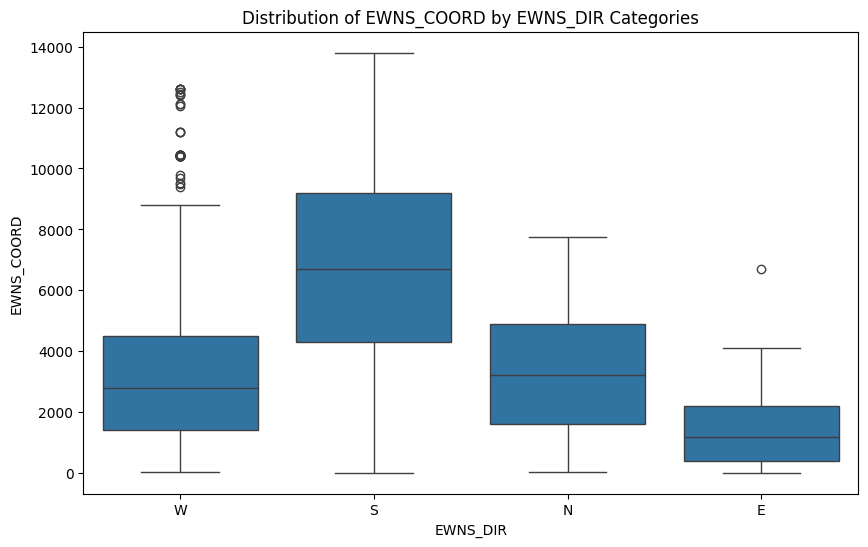

               EWNS_DIR_CODE  EWNS_COORD
EWNS_DIR_CODE       1.000000    0.372995
EWNS_COORD          0.372995    1.000000


In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='EWNS_DIR', y='EWNS_COORD', data=street_boundary)
plt.title('Distribution of EWNS_COORD by EWNS_DIR Categories')
plt.show()

if 'EWNS_DIR' in street_boundary.columns and street_boundary['EWNS_DIR'].dtype in ['int64', 'float64']:
    print(street_boundary[['EWNS_DIR', 'EWNS_COORD']].corr())
else:
    
    street_boundary['EWNS_DIR_CODE'] = street_boundary['EWNS_DIR'].astype('category').cat.codes
    print(street_boundary[['EWNS_DIR_CODE', 'EWNS_COORD']].corr())


Given the insights from the relationship between EWNS_COORD and EWNS_DIR and the moderate correlation observed, you can use EWNS_COORD to impute missing values in EWNS_DIR. The strategy involves setting thresholds based on the distribution of EWNS_COORD within each directional category to categorize missing EWNS_DIR based on EWNS_COORD values. 

Fill missing EWNS_DIR values using refined thresholds based on EWNS_COORD.                                
  - Define a function with adjusted thresholds to impute EWNS_DIR.                          
  - Check the remaining missing values in EWNS_DIR and verify the changes.                              
- The `EWNS_DIR` column is filled more accurately based on new thresholds, improving the data completeness  and consistency.                                   

In [95]:
def refine_impute_ewns_dir(row):

    if pd.isna(row['EWNS_DIR']):
        if row['EWNS_COORD'] < 2500:
            return 'W'
        elif 2500 <= row['EWNS_COORD'] < 7000:
            return 'S'
        elif 7000 <= row['EWNS_COORD'] < 9000:
            return 'N'
        else:
            return 'E'
    else:
        return row['EWNS_DIR']


street_boundary['EWNS_DIR'] = street_boundary.apply(refine_impute_ewns_dir, axis=1)


In [96]:
print("Missing EWNS_DIR:", street_boundary['EWNS_DIR'].isnull().sum())

Missing EWNS_DIR: 0


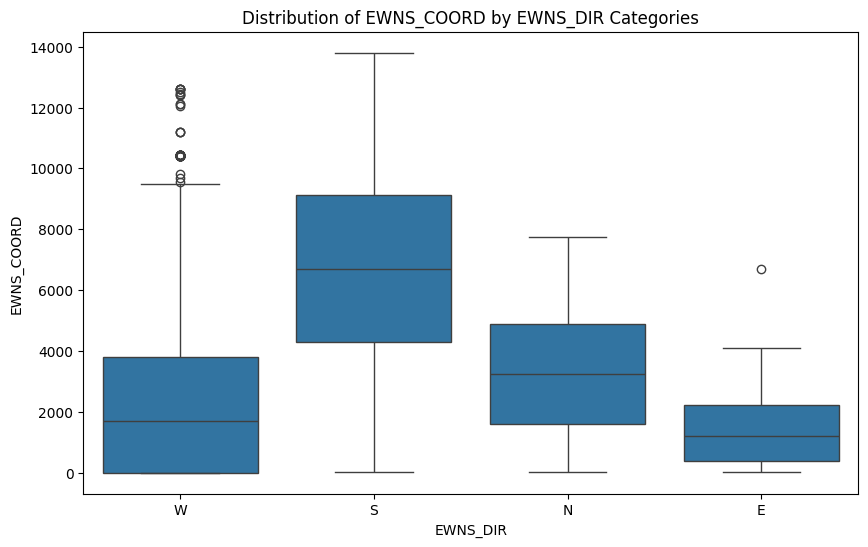

               EWNS_DIR_CODE  EWNS_COORD
EWNS_DIR_CODE       1.000000   -0.094314
EWNS_COORD         -0.094314    1.000000


In [97]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='EWNS_DIR', y='EWNS_COORD', data=street_boundary)
plt.title('Distribution of EWNS_COORD by EWNS_DIR Categories')
plt.show()

if 'EWNS_DIR' in street_boundary.columns and street_boundary['EWNS_DIR'].dtype in ['int64', 'float64']:
    print(street_boundary[['EWNS_DIR', 'EWNS_COORD']].corr())
else:
    street_boundary['EWNS_DIR_CODE'] = street_boundary['EWNS_DIR'].astype('category').cat.codes
    print(street_boundary[['EWNS_DIR_CODE', 'EWNS_COORD']].corr())


Fill missing values in the ONEWAY_DIR column with a default value 'two way street'

In [98]:
street_boundary['ONEWAY_DIR'].fillna(value='two way street', inplace=True)
print("Missing ONEWAY_DIR:", street_boundary['ONEWAY_DIR'].isnull().sum())

Missing ONEWAY_DIR: 0


In [99]:
print(f"Total rows before deletion: {street_boundary.shape[0]}")

Total rows before deletion: 55747


Removes rows from the street_boundary where the STREET_NAM column has missing values. 

In [101]:
street_boundary = street_boundary.dropna(subset=['STREET_NAM'])

In [102]:
print(f"Total rows after deletion: {street_boundary.shape[0]}")

Total rows after deletion: 55410


Fill missing values in the STREET_TYP column by distributing them proportionally based on the frequency of existing values, ensuring that the proportions of the different types remain consistent.

In [104]:
street_typ_counts = street_boundary['STREET_TYP'].value_counts()

street_typ_proportions = street_typ_counts / street_typ_counts.sum()
print(street_typ_proportions)

STREET_TYP
AVE     0.471446
ST      0.363799
PL      0.034400
EXPY    0.026916
DR      0.026806
RD      0.022012
BLVD    0.021683
ER      0.012351
XR      0.009222
PKWY    0.003623
CT      0.002928
TER     0.001336
RL      0.001025
HWY     0.000823
SR      0.000549
LN      0.000512
PLZ     0.000201
WAY     0.000128
SQ      0.000091
TOLL    0.000073
CRES    0.000037
ROW     0.000037
Name: count, dtype: float64


Step 1: Calculate the Number of Missing Values in STREET_TYP                                           
Step 2: Calculate the Proportional Distribution of Missing Values

In [105]:
num_missing = street_boundary['STREET_TYP'].isna().sum()

missing_distribution = (street_typ_proportions * num_missing).round().astype(int)

Step 3: Adjust for Rounding Errors                                                                                        

In [106]:
missing_distribution_adjusted = missing_distribution.copy()

difference = num_missing - missing_distribution_adjusted.sum()

for i in range(abs(difference)):
    index = i % len(missing_distribution_adjusted)
    if difference > 0:
        missing_distribution_adjusted.iloc[index] += 1
    else:
        missing_distribution_adjusted.iloc[index] -= 1

print(missing_distribution_adjusted)

STREET_TYP
AVE     359
ST      277
PL       26
EXPY     20
DR       20
RD       17
BLVD     16
ER        9
XR        7
PKWY      3
CT        2
TER       1
RL        1
HWY       1
SR        0
LN        0
PLZ       0
WAY       0
SQ        0
TOLL      0
CRES      0
ROW       0
Name: count, dtype: int32


Step 4: Generate the List of Missing Values                     
Step 5: Fill Missing Values in STREET_TYP                                                    
Step 6: Verify the Changes

In [107]:
missing_values = []

for street_typ, count in missing_distribution_adjusted.items():
    missing_values.extend([street_typ] * count)

np.random.shuffle(missing_values)

def fill_missing_street_typ(row):
    if pd.isna(row['STREET_TYP']):
        return missing_values.pop()
    return row['STREET_TYP']

street_boundary['STREET_TYP'] = street_boundary.apply(fill_missing_street_typ, axis=1)

remaining_missing_typ = street_boundary['STREET_TYP'].isna().sum()
print(f'Remaining missing STREET_TYP: {remaining_missing_typ}')

print(street_boundary.head())


Remaining missing STREET_TYP: 0
                                            the_geom  FNODE_ID  TNODE_ID  \
0  MULTILINESTRING ((-87.63187018232667 41.780809...     10809     16581   
1  MULTILINESTRING ((-87.60548932047061 41.762229...      6501     34082   
2  MULTILINESTRING ((-87.68381848191974 41.697243...     15338     22358   
3  MULTILINESTRING ((-87.645841892972 41.69339840...     15799     28881   
4  MULTILINESTRING ((-87.67053671318457 41.679759...     36407     36534   

   TRANS_ID PRE_DIR     STREET_NAM STREET_TYP  STREETNAME  L_F_ADD  L_T_ADD  \
0    127104       S           YALE        AVE        1782        0        0   
1    128895       S  COTTAGE GROVE        AVE        1236     7301     7359   
2    142645       S       CAMPBELL        AVE        1177    10801    10859   
3    148189       S       SANGAMON         ST        1696        0        0   
4    139728       W          118TH         ST        1823     1933     1959   

   ...      LENGTH  EDIT_DATE  EWNS_

In [108]:
print("Missing STREET_TYP:", street_boundary['STREET_TYP'].isnull().sum())

Missing STREET_TYP: 0


Fill missing values in the STATUS column with the mode of the column.

In [109]:
street_boundary['STATUS'].fillna(street_boundary['STATUS'].mode()[0], inplace=True)

In [110]:
print(f'shape is {street_boundary.shape}')
print(street_boundary.isnull().sum().to_string())

shape is (55410, 47)
the_geom         0
FNODE_ID         0
TNODE_ID         0
TRANS_ID         0
PRE_DIR          0
STREET_NAM       0
STREET_TYP       0
STREETNAME       0
L_F_ADD          0
L_T_ADD          0
R_F_ADD          0
R_T_ADD          0
LOGICLF          0
LOGICLT          0
LOGICRF          0
LOGICRT          0
CLASS            0
STATUS           0
STATUS_DAT       0
TIERED           0
ONEWAY_DIR       0
DIR_TRAVEL       0
EWNS             0
L_PARITY         0
R_PARITY         0
F_ZLEV           0
T_ZLEV           0
L_FIPS           0
R_FIPS           0
R_ZIP            0
L_ZIP            0
R_CENSUSBL       0
L_CENSUSBL       0
F_CROSS          0
F_CROSS_ST       0
T_CROSS          0
T_CROSS_ST       0
LENGTH           0
EDIT_DATE        0
EWNS_DIR         0
EWNS_COORD       0
CREATE_USE       0
CREATE_TIM       0
UPDATE_USE       0
UPDATE_TIM       0
SHAPE_LEN        0
EWNS_DIR_CODE    0


### [2]

# [b] From Raw to Information

### [i]


In [77]:
def year(x):
    match=re.search(r'\b\d{4}\b',x)
    if match:
        return int(match.group())
    else:
        return None

crashes['CRASH_YEAR']=crashes['CRASH_DATE'].apply(year)

### [ii]

### [iii]

### [iv]

### [v]

### [vi]

### [vii]

### [viii]

### [ix]

### [x]

### [xi]

### [xii]

# Question [2]: Data Analysis and Information Discovery

## [a] Traffic Accidents Causes


### [i]

### [ii]

### [iii]

### [iv]

## [b] Traffic Accidents History


### [i]

### [ii]

### [iii]

### [iv]

## [c] Spatial Analysis


### [i]

### [ii]

### [iii]

### [iv]

### [v]

### [vi]

## [d] Passengers Cases Analysis


### [i]

### [ii]

### [iii]

### [iv]

### [v]

## [e] Outlier Detection

### [i]

# Question [4]: Do What you Have to Do